# Statystyka matematyczna - ćwiczenia laboratoryjne

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [4]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

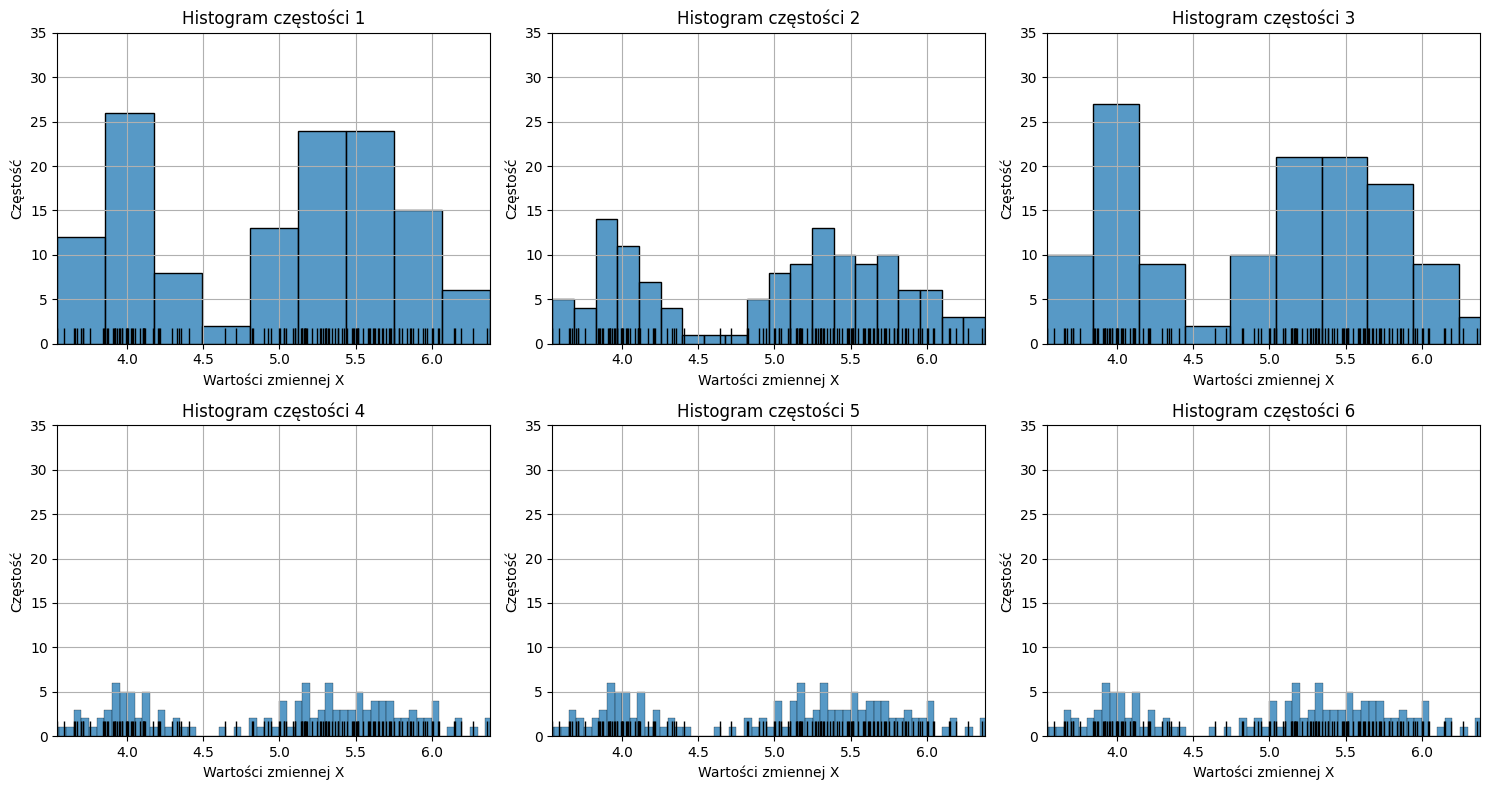

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
x_min = 2
x_max = 8
y_max = 35

sns.histplot(data=sample, x="X", stat="count", ax=axes[0])
sns.rugplot(data=sample, x="X", ax=axes[0], height=0.05, lw=1, color="black")
axes[0].set_title("Histogram częstości 1")

sns.histplot(data=sample, x="X", bins=20, stat="count", ax=axes[1])
sns.rugplot(data=sample, x="X", ax=axes[1], height=0.05, lw=1, color="black")
axes[1].set_title("Histogram częstości 2")

x_min = sample["X"].min()
x_max = sample["X"].max()
bins = np.arange(x_min, x_max + 0.3, 0.3)
sns.histplot(data=sample, x="X", bins=bins, stat="count", ax=axes[2])
sns.rugplot(data=sample, x="X", ax=axes[2], height=0.05, lw=1, color="black")
axes[2].set_title("Histogram częstości 3")

bins = np.arange(2, 8 + 0.05, 0.05)
sns.histplot(data=sample, x="X", bins=bins, stat="count", ax=axes[3])
sns.rugplot(data=sample, x="X", ax=axes[3], height=0.05, lw=1, color="black")
axes[3].set_title("Histogram częstości 4")

bins = np.arange(2, 8.15, 0.05)
sns.histplot(data=sample, x="X", bins=bins, stat="count", ax=axes[4])
sns.rugplot(data=sample, x="X", ax=axes[4], height=0.05, lw=1, color="black")
axes[4].set_title("Histogram częstości 5")

bins = np.arange(2, 8.4, 0.05)
sns.histplot(data=sample, x="X", bins=bins, stat="count", ax=axes[5])
sns.rugplot(data=sample, x="X", ax=axes[5], height=0.05, lw=1, color="black")
axes[5].set_title("Histogram częstości 6")

for ax in axes:
    ax.set_xlabel("Wartości zmiennej X")
    ax.set_ylabel("Częstość")
    ax.set_xlim(x_min, x_max)  
    ax.set_ylim(0, y_max)      
    ax.grid(True)
   

plt.tight_layout()
plt.show()

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [31]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    pdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    # YOUR CODE HERE

    # 1) wyciągnięcie wartości
    values = data["X"].values
    
    # 2) zakres: [min-3σ, max+3σ]
    xmin, xmax = values.min(), values.max()
    X = np.linspace(xmin - 3*sigma, xmax + 3*sigma, estimation_points)
    step = X[1] - X[0]
    
    # 3) macierz gęstości jądra: shape = (estimation_points, n_samples)
    pdf_matrix = norm.pdf(X[:, None], loc=values[None, :], scale=sigma)
    f = pdf_matrix.sum(axis=1)
    
    # 4) normalizacja (pole ≈1)
    area = np.sum(f) * step
    f /= area
    
    # 5) DataFrame wynikowy
    pdf = pd.DataFrame({"X": X, "KDE": f})
    
    # 6) wykres + rug
    plt.figure(figsize=(10, 6))
    plt.plot(X, f, lw=2)
    plt.fill_between(X, f, alpha=0.3)
    rug_y = -0.05 * f.max()
    plt.plot(values, np.full_like(values, rug_y), '|', markeredgewidth=1)
    plt.ylim(rug_y - 0.01*f.max(), f.max()*1.05)
    plt.xlabel("X")
    plt.ylabel("Estimated Density")
    plt.title(f"KDE (Gaussian kernel, σ={sigma})")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return pdf


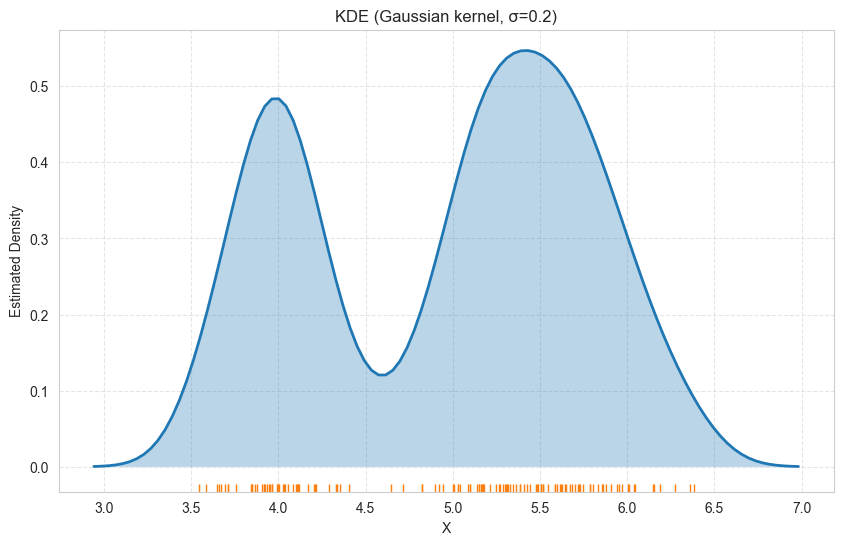

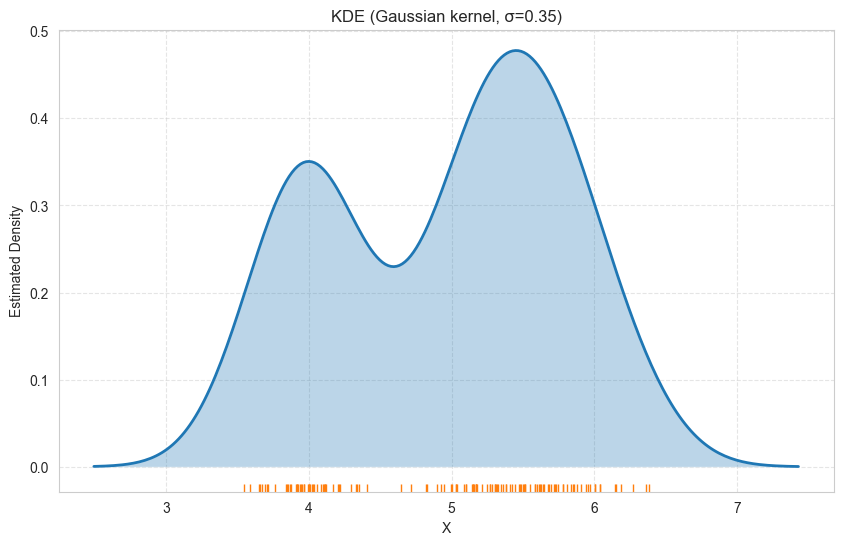

In [32]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

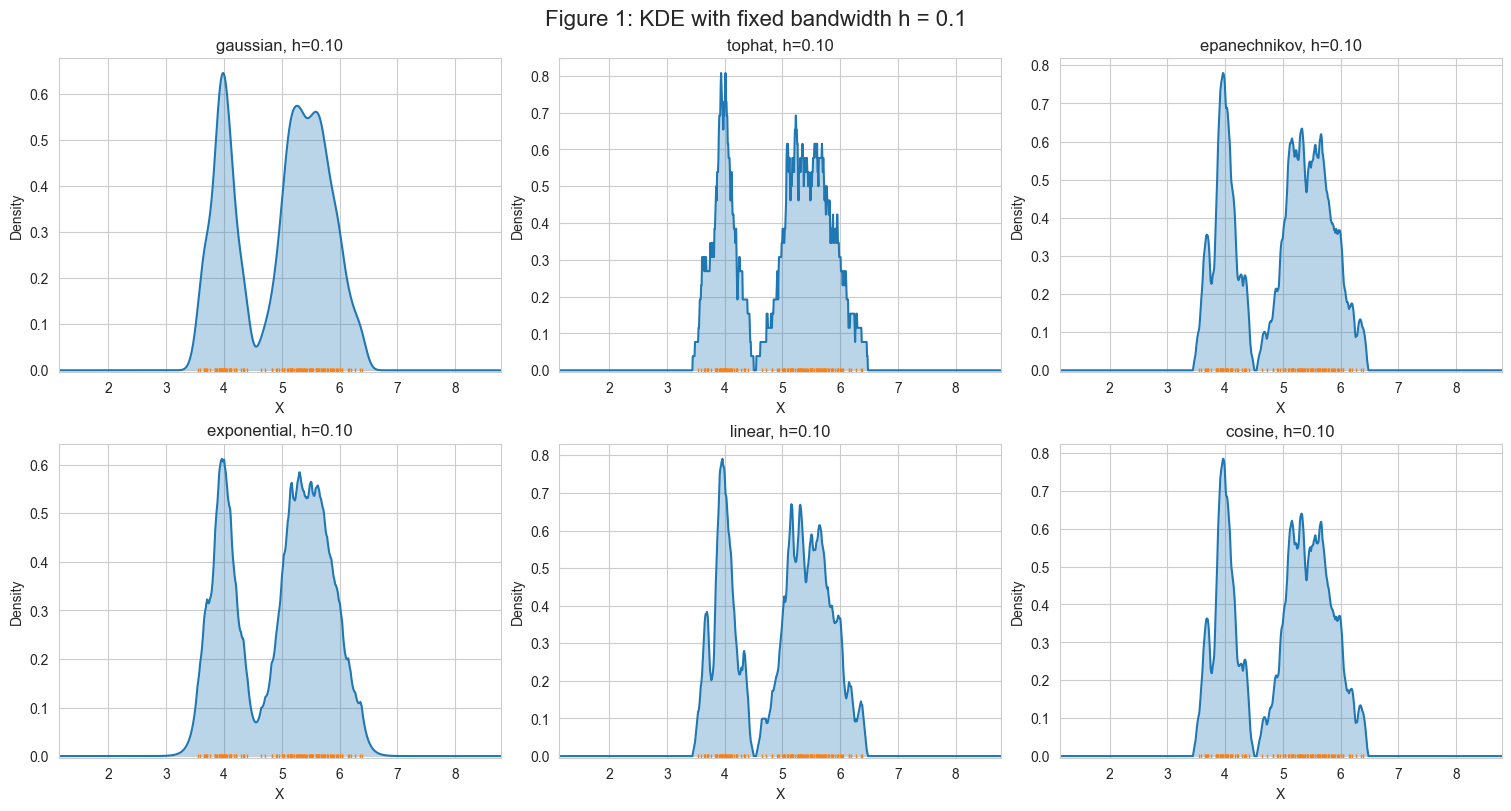

In [33]:
# Figura 1
data = sample['X'].values
sigma = data.std(ddof=1)
x_min, x_max = data.min() - 3*sigma, data.max() + 3*sigma
x_grid = np.linspace(x_min, x_max, 1000)

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

def compute_kde(data, kernel, bandwidth, x_grid):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(data[:, None])
    log_dens = kde.score_samples(x_grid[:, None])
    return np.exp(log_dens)

def plot_kde(ax, data, kernel, bandwidth, x_grid):
    y = compute_kde(data, kernel, bandwidth, x_grid)
    ax.plot(x_grid, y, lw=1.5)
    ax.fill_between(x_grid, y, alpha=0.3)
    rug_y = np.full_like(data, -0.005 * y.max())
    ax.plot(data, rug_y, '|', markeredgewidth=1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(rug_y.min() * 1.1, y.max() * 1.05)
    ax.set_title(f"{kernel}, h={bandwidth:.2f}")
    ax.set_xlabel("X")
    ax.set_ylabel("Density")

fig1, axes1 = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig1.suptitle("Figure 1: KDE with fixed bandwidth h = 0.1", fontsize=16)

for ax, kernel in zip(axes1.flat, kernels):
    plot_kde(ax, data, kernel, bandwidth=0.1, x_grid=x_grid)

plt.show()

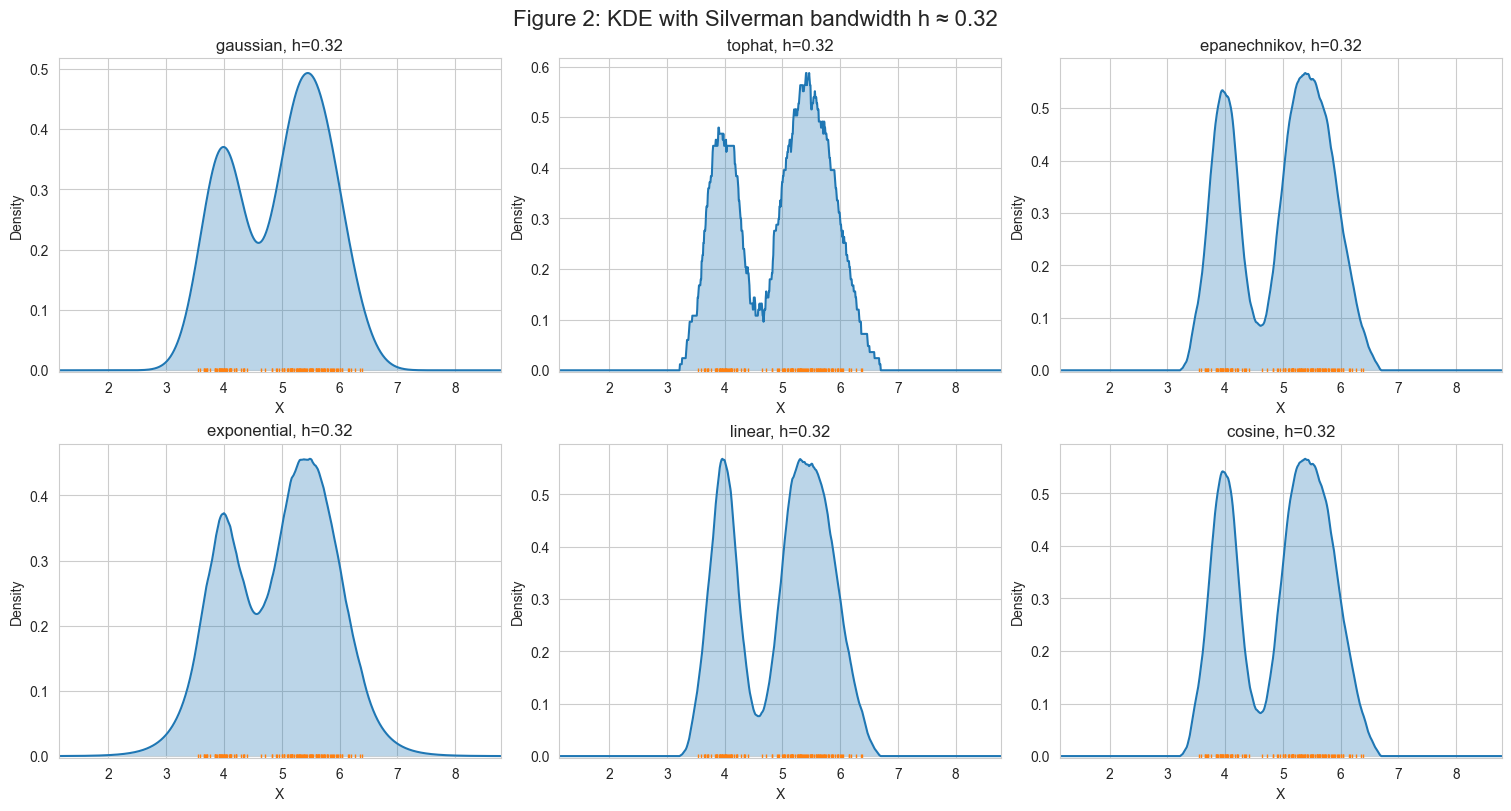

In [34]:
# Figura 2
data = sample['X'].values
n = data.size
sigma = data.std(ddof=1)
# Silverman’s rule: h = 1.06 * sigma * n^(-1/5)
h_silverman = 1.06 * sigma * n**(-1/5)

x_min, x_max = data.min() - 3*sigma, data.max() + 3*sigma
x_grid = np.linspace(x_min, x_max, 1000)

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

def compute_kde(data, kernel, bandwidth, x_grid):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(data[:, None])
    log_dens = kde.score_samples(x_grid[:, None])
    return np.exp(log_dens)

def plot_kde(ax, data, kernel, bandwidth, x_grid):
    y = compute_kde(data, kernel, bandwidth, x_grid)
    ax.plot(x_grid, y, lw=1.5)
    ax.fill_between(x_grid, y, alpha=0.3)
    rug_y = np.full_like(data, -0.005 * y.max())
    ax.plot(data, rug_y, '|', markeredgewidth=1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(rug_y.min() * 1.1, y.max() * 1.05)
    ax.set_title(f"{kernel}, h={bandwidth:.2f}")
    ax.set_xlabel("X")
    ax.set_ylabel("Density")

fig2, axes2 = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig2.suptitle(f"Figure 2: KDE with Silverman bandwidth h ≈ {h_silverman:.2f}", fontsize=16)

for ax, kernel in zip(axes2.flat, kernels):
    plot_kde(ax, data, kernel, bandwidth=h_silverman, x_grid=x_grid)

plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

1. Histogram
   
    Zalety:

    -umożliwia szybką ocenę kształtu rozkładu danych,

    -jest odporny na wartości odstające — pojedyncze skrajne obserwacje nie zniekształcają wykresu,

    -dobrze sprawdza się przy prostych analizach i danych podzielonych na kategorie.

    Wady:
    
    -tworzy wykres o charakterze skokowym, co może ukrywać drobniejsze cechy rozkładu,
    
    -wynik silnie zależy od liczby, szerokości i rozmieszczenia przedziałów,
    
    -brak jednolitych zasad doboru parametrów utrudnia porównanie wyników między analizami.

2. Estymacja funkcją jądrową (KDE)
   
    Zalety:
    
    -daje gładki, ciągły wykres, który lepiej pokazuje ogólny kształt rozkładu,
    
    -pozwala zauważyć więcej szczegółów, np. kilka maksimów w danych,
    
    -nie wymaga podziału danych na przedziały.

    Wady:
    
    -jest bardziej podatna na wpływ wartości odstających,
    
    -jakość wykresu mocno zależy od doboru szerokości jądra — może być zbyt szczegółowy lub zbyt uśredniony,
    
    -interpretacja może być trudniejsza, szczególnie bez wcześniejszej znajomości tej metody.

3. Wpływ parametrów histogramu

    Liczba przedziałów:
    
    -zbyt mała liczba upraszcza wykres i może ukrywać istotne cechy danych,
    
    -zbyt duża liczba powoduje, że wykres staje się nieczytelny, z widocznymi przypadkowymi zmianami.
    
    Szerokość przedziałów:
    
    -szerokie przedziały zacierają szczegóły,
    
    -wąskie przedziały mogą nadmiernie eksponować drobne różnice między wartościami.
    
    Położenie granic przedziałów:
    
    -nawet przy tej samej liczbie i szerokości przedziałów, inne ich umiejscowienie może zmienić wygląd wykresu,
    
    -źle dobrane granice mogą np. rozdzielić jedno wyraźne maksimum na dwa mniejsze.

4. Wpływ parametrów estymacji jądrowej (KDE)
   
    Wykorzystana wersja funkcji jądra:
    
    -najczęściej stosowane są jądra Gaussowskie, prostokątne lub Epanechnikova,
    
    -różnią się sposobem wygładzania wykresu — Gaussowskie daje najłagodniejsze przejścia,
    
    -wybór jądra wpływa na wygląd wykresu, ale zwykle mniej niż szerokość pasma.
    
    Szerokość jądra (bandwidth):
    
    -to najważniejszy parametr — decyduje, jak bardzo dane zostaną wygładzone,
    
    -zbyt mała szerokość powoduje, że wykres jest zbyt szczegółowy i niestabilny,
    
    -zbyt duża szerokość prowadzi do zatarcia ważnych cech rozkładu.

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [21]:
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    # YOUR CODE HERE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstwo   # ← make sure this is here!

def cdf_estimation(data: pd.DataFrame, alpha: float) -> pd.DataFrame:
    # 1. Sortujemy wartości próby
    x = np.sort(data['X'].values)
    n = len(x)

    # 2. Empiryczna dystrybuanta Fn(x_i) = i / n
    F_d = np.arange(1, n + 1) / n

    # 3. Krytyczna wartość D_{1−α,n}
    D = kstwo.ppf(1 - alpha, n)

    # 4. Granice przedziału ufności
    F_d_min = np.maximum(F_d - D, 0)
    F_d_max = np.minimum(F_d + D, 1)

    # 5. Wykres
    plt.figure()
    plt.plot(x, F_d, marker='o', linestyle='-', label='Dystrybuanta empiryczna')
    plt.fill_between(x, F_d_min, F_d_max, alpha=0.2, label='Przedział ufności')
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={alpha}')
    plt.xlabel('X')
    plt.ylabel('F(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 6. Zwracamy DataFrame
    return pd.DataFrame({
        'X':       x,
        'F_d':     F_d,
        'F_d_min': F_d_min,
        'F_d_max': F_d_max
    })


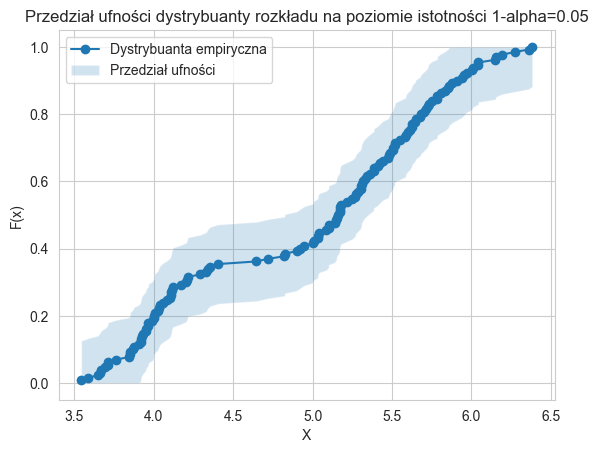

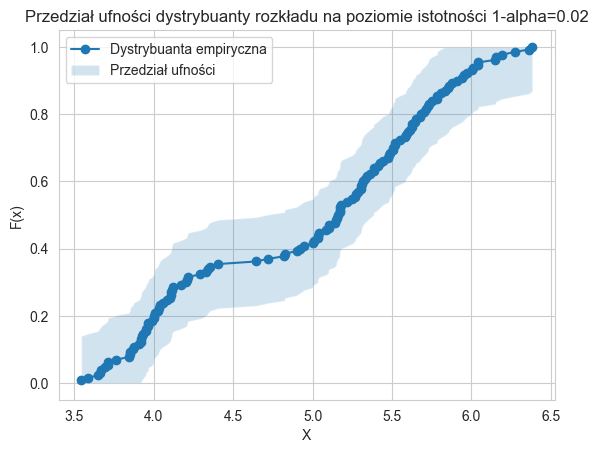

In [22]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))